## Lifecycle analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime


In [2]:
df_lifecycle_bad = pd.read_csv("../csv_outputs/bad_tokens/master_lifecycle.csv")
df_lifecycle_good = pd.read_csv("../csv_outputs/good_tokens/master_lifecycle.csv")

In [3]:
df_lifecycle_bad.columns

Index(['token_address', 'chain', 'token_name', 'token_age_seconds',
       'token_creation_date', 'creation_to_first_trade_seconds',
       'creation_to_first_trade_blocks', 'last_tx_hash', 'last_active_age',
       'inactive_days'],
      dtype='object')

## Token age (Time since first transaction) (days) Insights

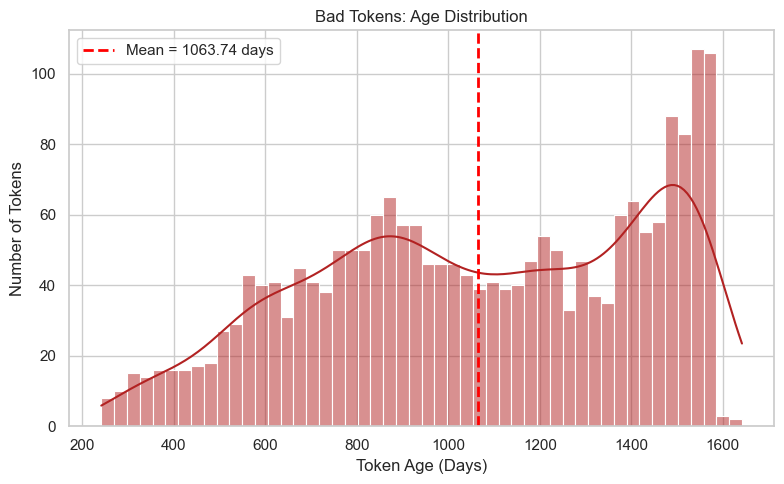

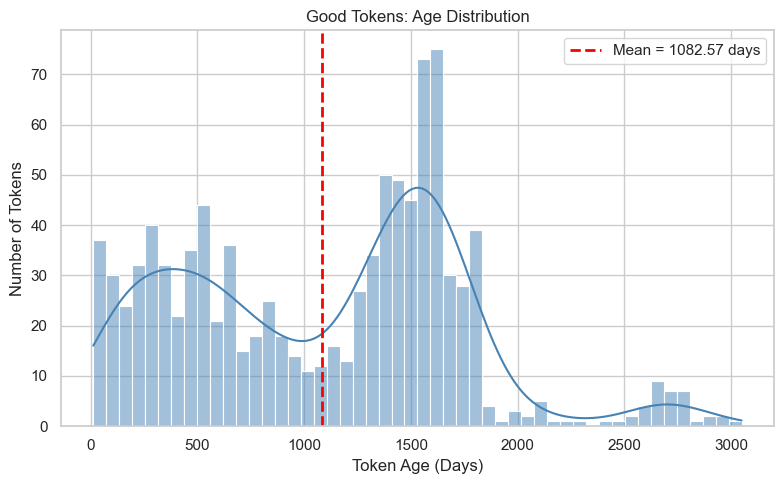

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_lifecycle.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_lifecycle.csv")

# Set Seaborn style
sns.set_theme(style='whitegrid')

# Convert token age to days
df_bad['token_age_days'] = df_bad['token_age_seconds'] / (60 * 60 * 24)
df_good['token_age_days'] = df_good['token_age_seconds'] / (60 * 60 * 24)

# Function to plot token age histogram
def plot_token_age(df, title, color):
    mean_age = df['token_age_days'].mean()
    
    plt.figure(figsize=(8, 5))
    sns.histplot(df['token_age_days'], bins=50, kde=True, color=color)
    plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_age:.2f} days')
    
    plt.title(title)
    plt.xlabel('Token Age (Days)')
    plt.ylabel('Number of Tokens')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot bad tokens
plot_token_age(
    df=df_bad,
    title='Bad Tokens: Age Distribution',
    color='firebrick'
)

# Plot good tokens
plot_token_age(
    df=df_good,
    title='Good Tokens: Age Distribution',
    color='steelblue'
)


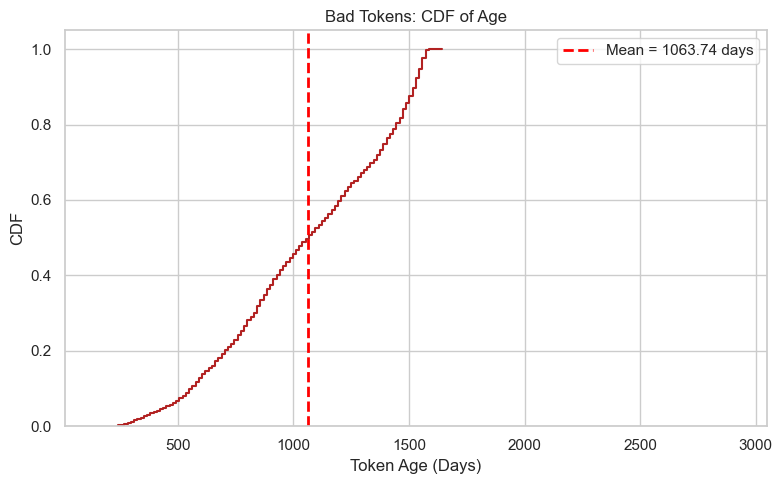

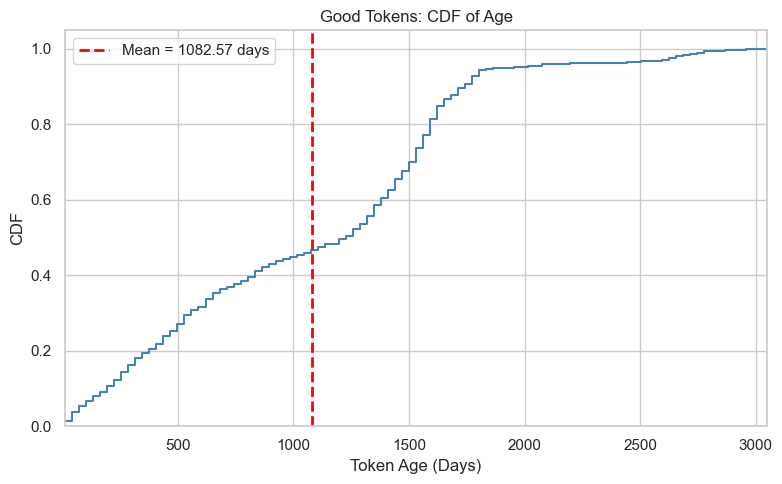

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_lifecycle.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_lifecycle.csv")

# Set Seaborn style
sns.set_theme(style='whitegrid')

# Convert token age to days
df_bad['token_age_days'] = df_bad['token_age_seconds'] / (60 * 60 * 24)
df_good['token_age_days'] = df_good['token_age_seconds'] / (60 * 60 * 24)

# Get global min and max for token age across both datasets
min_age = min(df_bad['token_age_days'].min(), df_good['token_age_days'].min())
max_age = max(df_bad['token_age_days'].max(), df_good['token_age_days'].max())

# Function to plot CDF of token age
def plot_token_age_cdf(df, title, color):
    mean_age = df['token_age_days'].mean()

    plt.figure(figsize=(8, 5))
    sns.histplot(
        df['token_age_days'],
        bins=100,
        stat='density',
        cumulative=True,
        color=color,
        element='step',
        fill=False
    )
    
    plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_age:.2f} days')
    plt.title(title)
    plt.xlabel('Token Age (Days)')
    plt.ylabel('CDF')
    plt.xlim(min_age, max_age)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot CDF for bad tokens
plot_token_age_cdf(
    df=df_bad,
    title='Bad Tokens: CDF of Age',
    color='firebrick'
)

# Plot CDF for good tokens
plot_token_age_cdf(
    df=df_good,
    title='Good Tokens: CDF of Age',
    color='steelblue'
)


## Token Creation Date Insights

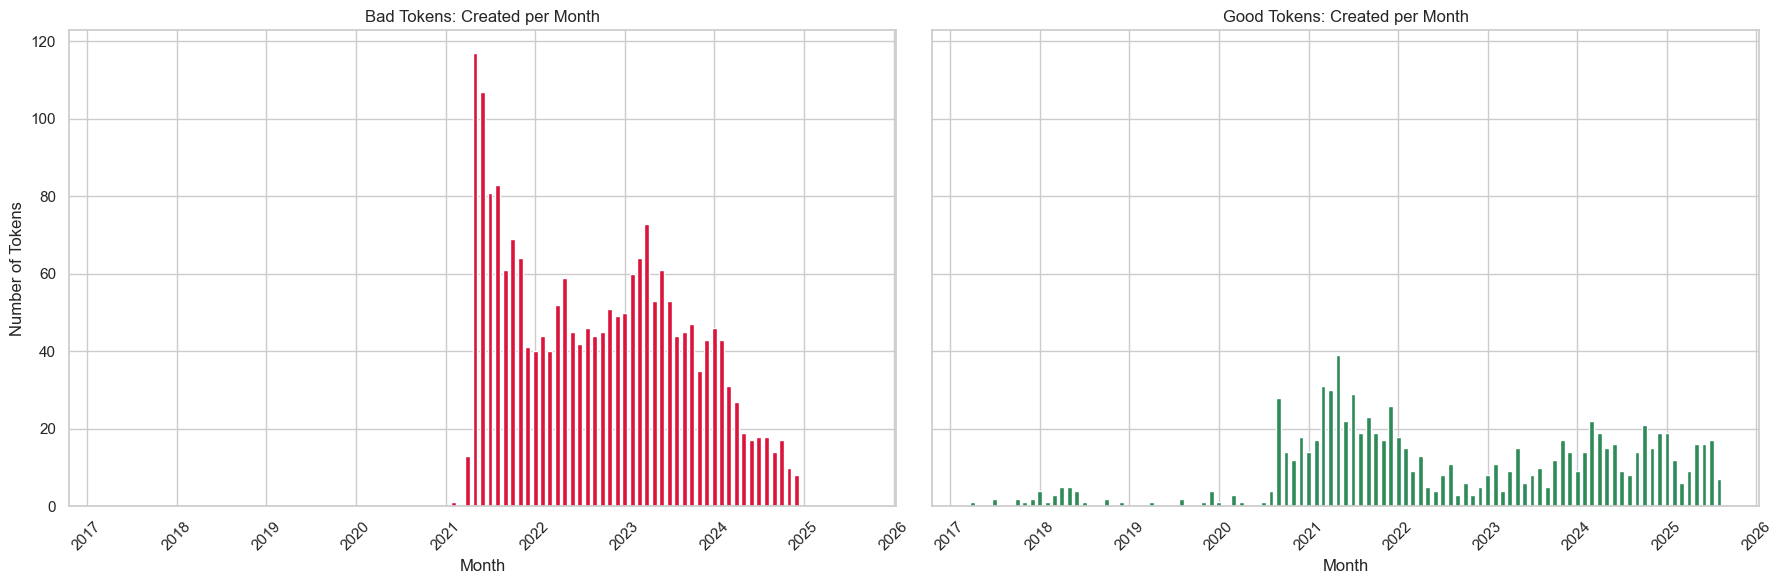

In [5]:
# Load data
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_lifecycle.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_lifecycle.csv")

# Convert to datetime
df_bad['token_creation_date'] = pd.to_datetime(df_bad['token_creation_date'])
df_good['token_creation_date'] = pd.to_datetime(df_good['token_creation_date'])

# Group by month (PeriodIndex)
bad_monthly = df_bad['token_creation_date'].dt.to_period('M').value_counts().sort_index()
good_monthly = df_good['token_creation_date'].dt.to_period('M').value_counts().sort_index()

# Align indices to ensure consistent X-axis
all_months = bad_monthly.index.union(good_monthly.index).sort_values()
bad_monthly = bad_monthly.reindex(all_months, fill_value=0)
good_monthly = good_monthly.reindex(all_months, fill_value=0)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot for bad tokens
axes[0].bar(all_months.to_timestamp(), bad_monthly.values, color='crimson', width=20)
axes[0].set_title('Bad Tokens: Created per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Tokens')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot for good tokens
axes[1].bar(all_months.to_timestamp(), good_monthly.values, color='seagreen', width=20)
axes[1].set_title('Good Tokens: Created per Month')
axes[1].set_xlabel('Month')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Final layout
plt.tight_layout()
plt.show()


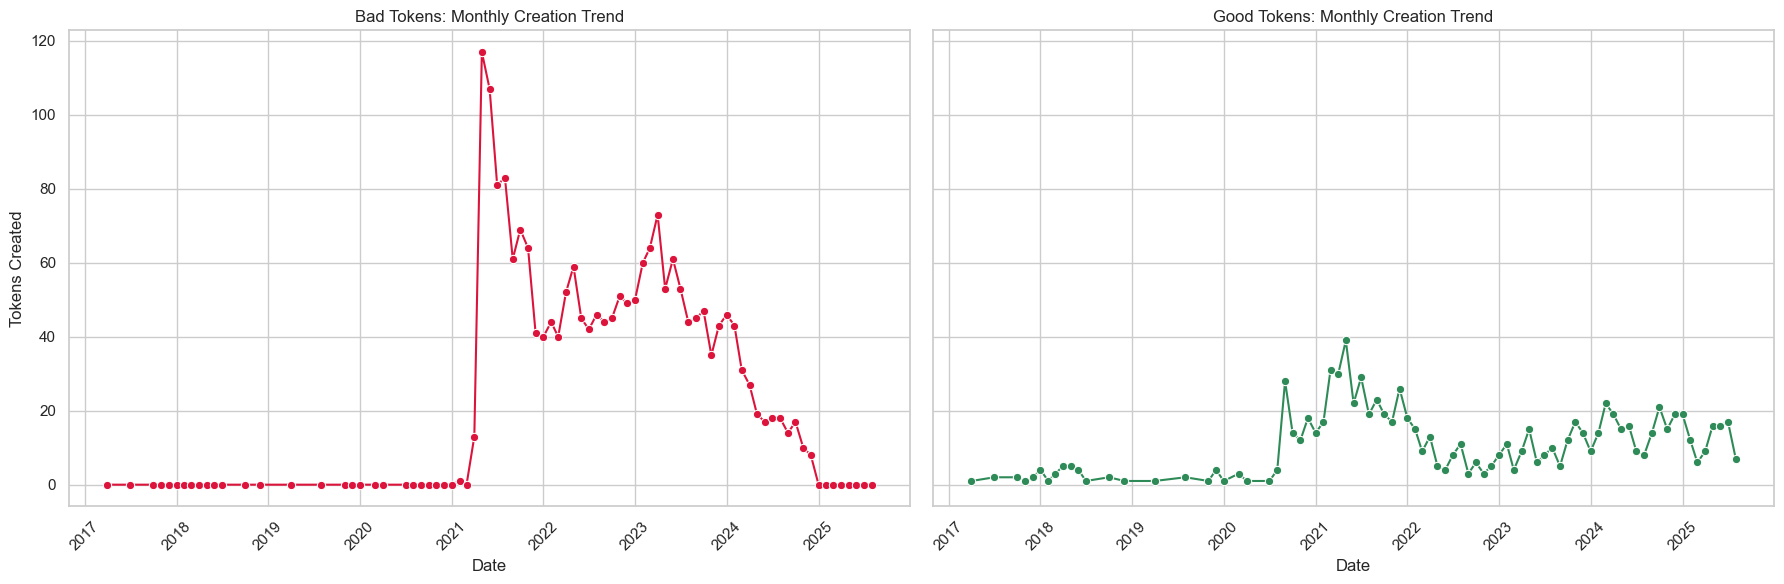

In [6]:
# Load data
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_lifecycle.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_lifecycle.csv")

# Convert to datetime
df_bad['token_creation_date'] = pd.to_datetime(df_bad['token_creation_date'])
df_good['token_creation_date'] = pd.to_datetime(df_good['token_creation_date'])

# Monthly counts using PeriodIndex
bad_monthly = df_bad['token_creation_date'].dt.to_period('M').value_counts().sort_index()
good_monthly = df_good['token_creation_date'].dt.to_period('M').value_counts().sort_index()

# Align indices for consistent X-axis
all_months = bad_monthly.index.union(good_monthly.index).sort_values()
bad_monthly = bad_monthly.reindex(all_months, fill_value=0)
good_monthly = good_monthly.reindex(all_months, fill_value=0)

# Convert PeriodIndex to timestamps for plotting
x_dates = all_months.to_timestamp()

# Set theme
sns.set_theme(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Bad tokens plot
sns.lineplot(ax=axes[0], x=x_dates, y=bad_monthly.values, marker='o', color='crimson')
axes[0].set_title('Bad Tokens: Monthly Creation Trend')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Tokens Created')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Good tokens plot
sns.lineplot(ax=axes[1], x=x_dates, y=good_monthly.values, marker='o', color='seagreen')
axes[1].set_title('Good Tokens: Monthly Creation Trend')
axes[1].set_xlabel('Date')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Final layout
plt.tight_layout()
plt.show()


## Creation to first trade delay: Time (seconds) and Blocks

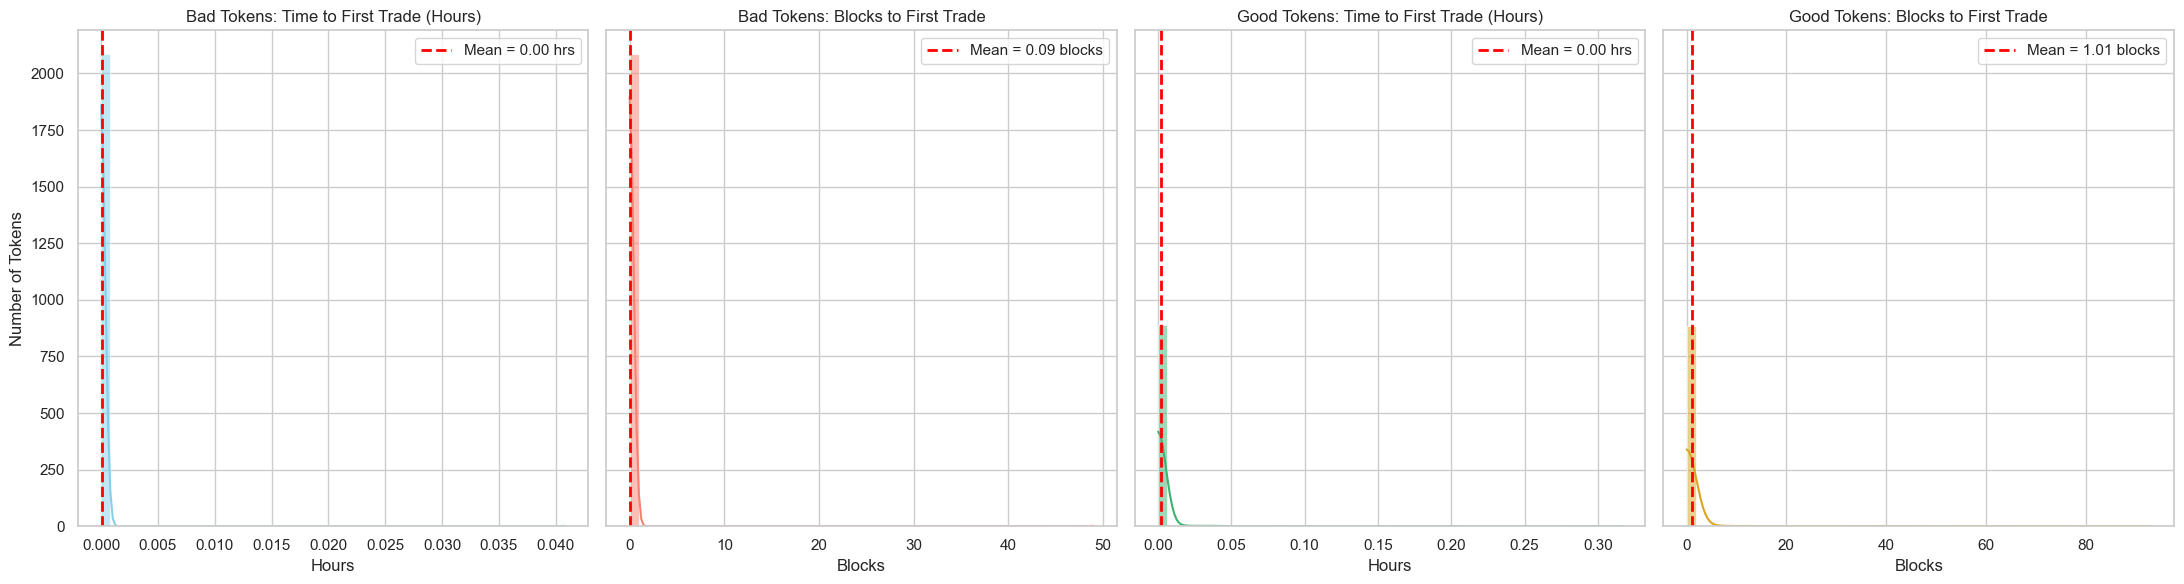

In [7]:
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_lifecycle.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_lifecycle.csv")

# Convert to hours
df_bad['first_trade_hours'] = df_bad['creation_to_first_trade_seconds'] / 3600
df_good['first_trade_hours'] = df_good['creation_to_first_trade_seconds'] / 3600

# Set theme
sns.set_theme(style='whitegrid')

# Create subplots (2 rows × 2 columns)
fig, axes = plt.subplots(1, 4, figsize=(22, 6), sharey='row')

# === BAD TOKENS ===
mean_hours_bad = df_bad['first_trade_hours'].mean()
mean_blocks_bad = df_bad['creation_to_first_trade_blocks'].mean()

# Plot 1: Bad tokens - Hours to first trade
sns.histplot(df_bad['first_trade_hours'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(mean_hours_bad, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_hours_bad:.2f} hrs')
axes[0].set_title('Bad Tokens: Time to First Trade (Hours)')
axes[0].set_xlabel('Hours')
axes[0].set_ylabel('Number of Tokens')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Bad tokens - Blocks to first trade
sns.histplot(df_bad['creation_to_first_trade_blocks'], bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].axvline(mean_blocks_bad, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_blocks_bad:.2f} blocks')
axes[1].set_title('Bad Tokens: Blocks to First Trade')
axes[1].set_xlabel('Blocks')
axes[1].set_ylabel('')
axes[1].legend()
axes[1].grid(True)

# === GOOD TOKENS ===
mean_hours_good = df_good['first_trade_hours'].mean()
mean_blocks_good = df_good['creation_to_first_trade_blocks'].mean()

# Plot 3: Good tokens - Hours to first trade
sns.histplot(df_good['first_trade_hours'], bins=50, kde=True, ax=axes[2], color='mediumseagreen')
axes[2].axvline(mean_hours_good, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_hours_good:.2f} hrs')
axes[2].set_title('Good Tokens: Time to First Trade (Hours)')
axes[2].set_xlabel('Hours')
axes[2].set_ylabel('')
axes[2].legend()
axes[2].grid(True)

# Plot 4: Good tokens - Blocks to first trade
sns.histplot(df_good['creation_to_first_trade_blocks'], bins=50, kde=True, ax=axes[3], color='goldenrod')
axes[3].axvline(mean_blocks_good, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_blocks_good:.2f} blocks')
axes[3].set_title('Good Tokens: Blocks to First Trade')
axes[3].set_xlabel('Blocks')
axes[3].set_ylabel('')
axes[3].legend()
axes[3].grid(True)

# Layout
plt.tight_layout()
plt.show()

## Last active age (Time since last transaction)

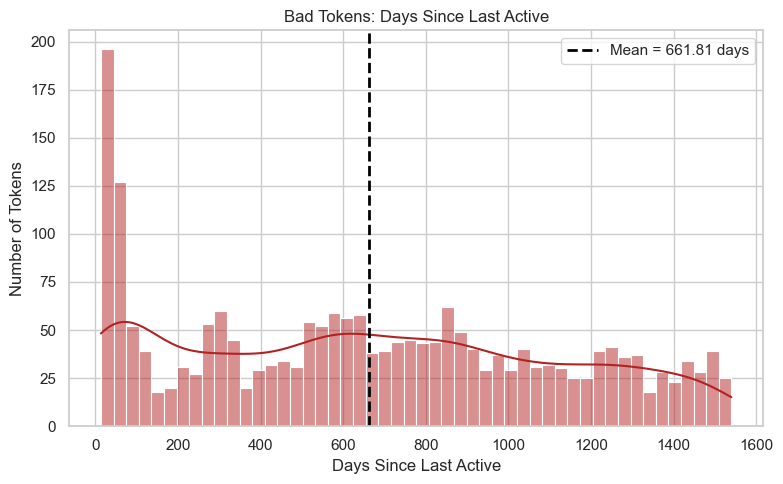

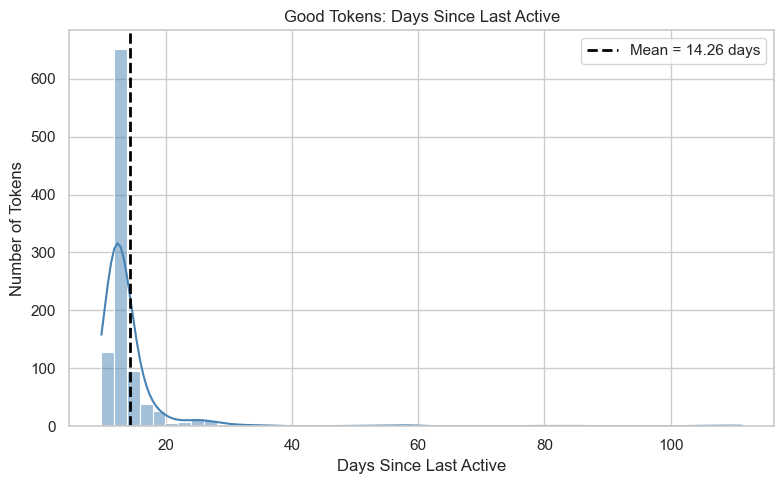

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load data
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_lifecycle.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_lifecycle.csv")

# Convert to datetime, coerce errors to NaT
df_bad['last_active_age'] = pd.to_datetime(df_bad['last_active_age'], errors='coerce')
df_good['last_active_age'] = pd.to_datetime(df_good['last_active_age'], errors='coerce')

# Get today's date
today = pd.to_datetime(datetime.today())

# Compute days since last active
df_bad['days_since_last_active'] = (today - df_bad['last_active_age']).dt.total_seconds() / (60 * 60 * 24)
df_good['days_since_last_active'] = (today - df_good['last_active_age']).dt.total_seconds() / (60 * 60 * 24)

# Filter out nulls
df_bad_clean = df_bad[df_bad['days_since_last_active'].notnull()]
df_good_clean = df_good[df_good['days_since_last_active'].notnull()]

# Means
mean_bad = df_bad_clean['days_since_last_active'].mean()
mean_good = df_good_clean['days_since_last_active'].mean()

# Set Seaborn style
sns.set_theme(style='whitegrid')

# ==== Plot for bad tokens ====
plt.figure(figsize=(8, 5))
sns.histplot(df_bad_clean['days_since_last_active'], bins=50, kde=True, color='firebrick')
plt.axvline(mean_bad, color='black', linestyle='--', linewidth=2, label=f'Mean = {mean_bad:.2f} days')
plt.title('Bad Tokens: Days Since Last Active')
plt.xlabel('Days Since Last Active')
plt.ylabel('Number of Tokens')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==== Plot for good tokens ====
plt.figure(figsize=(8, 5))
sns.histplot(df_good_clean['days_since_last_active'], bins=50, kde=True, color='steelblue')
plt.axvline(mean_good, color='black', linestyle='--', linewidth=2, label=f'Mean = {mean_good:.2f} days')
plt.title('Good Tokens: Days Since Last Active')
plt.xlabel('Days Since Last Active')
plt.ylabel('Number of Tokens')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


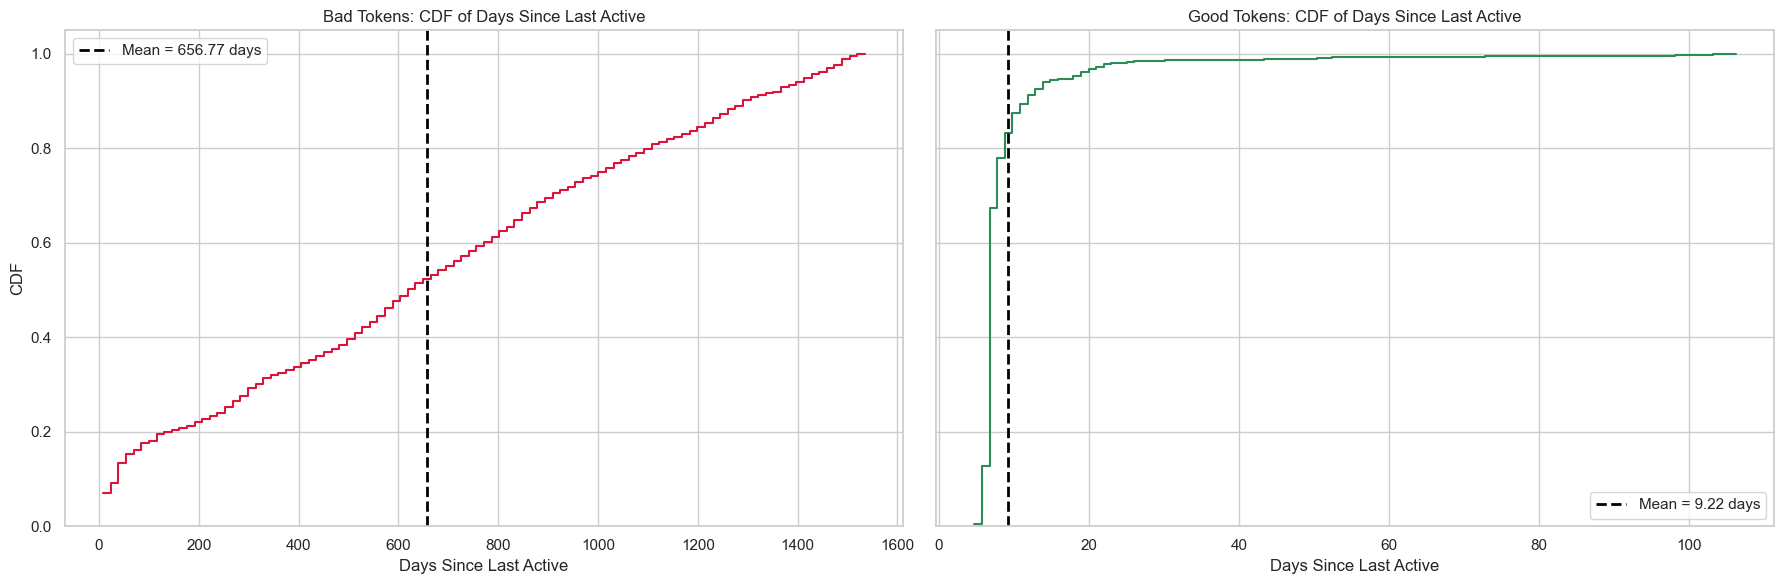

In [12]:
# Load data
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_lifecycle.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_lifecycle.csv")

# Convert to datetime, coerce errors to NaT
df_bad['last_active_age'] = pd.to_datetime(df_bad['last_active_age'], errors='coerce')
df_good['last_active_age'] = pd.to_datetime(df_good['last_active_age'], errors='coerce')

# Get today's date
today = pd.to_datetime(datetime.today())

# Compute days since last active
df_bad['days_since_last_active'] = (today - df_bad['last_active_age']).dt.total_seconds() / (60 * 60 * 24)
df_good['days_since_last_active'] = (today - df_good['last_active_age']).dt.total_seconds() / (60 * 60 * 24)

# Filter out nulls
df_bad_clean = df_bad[df_bad['days_since_last_active'].notnull()]
df_good_clean = df_good[df_good['days_since_last_active'].notnull()]

# Means
mean_bad = df_bad_clean['days_since_last_active'].mean()
mean_good = df_good_clean['days_since_last_active'].mean()

# Set style
sns.set_theme(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot for bad tokens (CDF)
sns.histplot(
    df_bad_clean['days_since_last_active'],
    bins=100,
    stat='density',
    cumulative=True,
    color='crimson',
    element='step',
    fill=False,
    ax=axes[0]
)
axes[0].axvline(mean_bad, color='black', linestyle='--', linewidth=2, label=f'Mean = {mean_bad:.2f} days')
axes[0].set_title('Bad Tokens: CDF of Days Since Last Active')
axes[0].set_xlabel('Days Since Last Active')
axes[0].set_ylabel('CDF')
axes[0].legend()
axes[0].grid(True)

# Plot for good tokens (CDF)
sns.histplot(
    df_good_clean['days_since_last_active'],
    bins=100,
    stat='density',
    cumulative=True,
    color='seagreen',
    element='step',
    fill=False,
    ax=axes[1]
)
axes[1].axvline(mean_good, color='black', linestyle='--', linewidth=2, label=f'Mean = {mean_good:.2f} days')
axes[1].set_title('Good Tokens: CDF of Days Since Last Active')
axes[1].set_xlabel('Days Since Last Active')
axes[1].set_ylabel('')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


## How long the token was inactive

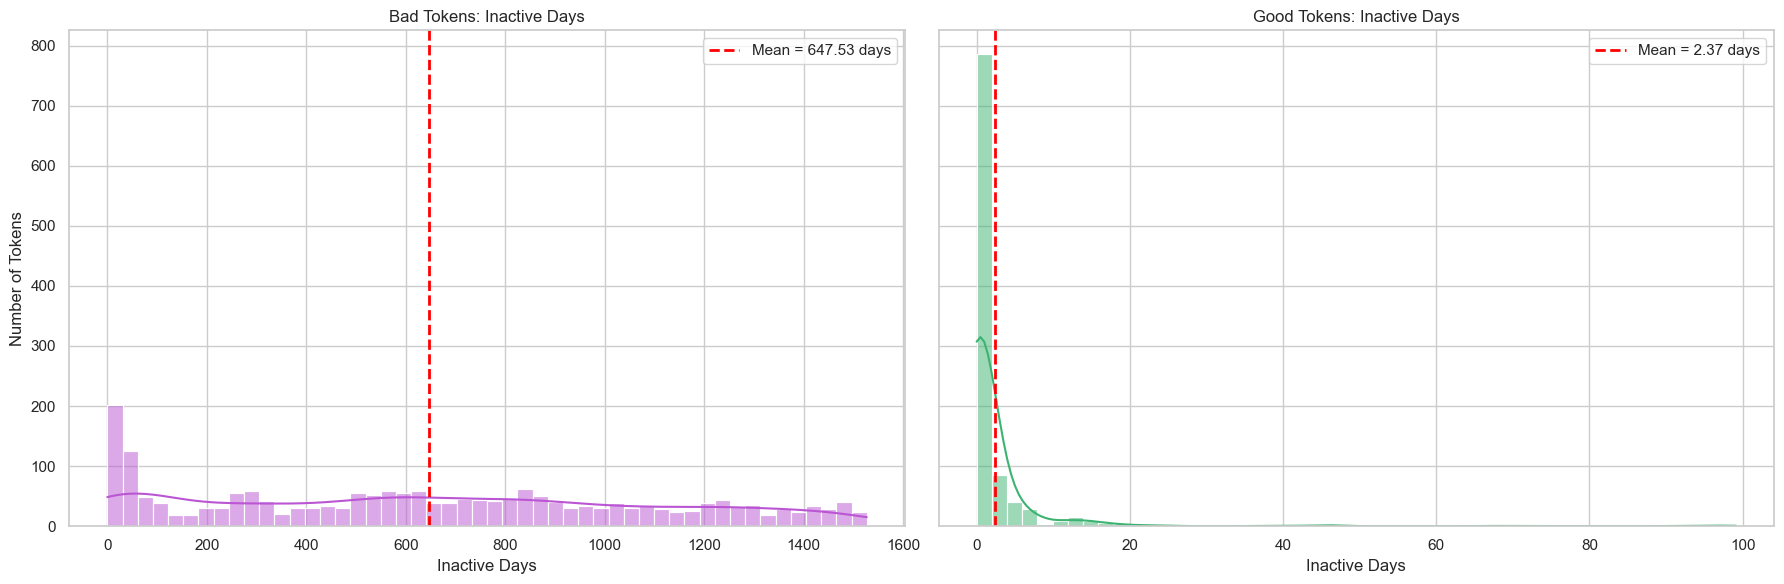

In [9]:
# Load data
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_lifecycle.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_lifecycle.csv")

# Filter out nulls
df_bad_clean = df_bad[df_bad['inactive_days'].notnull()]
df_good_clean = df_good[df_good['inactive_days'].notnull()]

# Calculate means
mean_inactive_bad = df_bad_clean['inactive_days'].mean()
mean_inactive_good = df_good_clean['inactive_days'].mean()

# Set theme
sns.set_theme(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot for bad tokens
sns.histplot(df_bad_clean['inactive_days'], bins=50, kde=True, color='mediumorchid', ax=axes[0])
axes[0].axvline(mean_inactive_bad, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_inactive_bad:.2f} days')
axes[0].set_title('Bad Tokens: Inactive Days')
axes[0].set_xlabel('Inactive Days')
axes[0].set_ylabel('Number of Tokens')
axes[0].legend()
axes[0].grid(True)

# Plot for good tokens
sns.histplot(df_good_clean['inactive_days'], bins=50, kde=True, color='mediumseagreen', ax=axes[1])
axes[1].axvline(mean_inactive_good, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_inactive_good:.2f} days')
axes[1].set_title('Good Tokens: Inactive Days')
axes[1].set_xlabel('Inactive Days')
axes[1].set_ylabel('')
axes[1].legend()
axes[1].grid(True)

# Layout
plt.tight_layout()
plt.show()

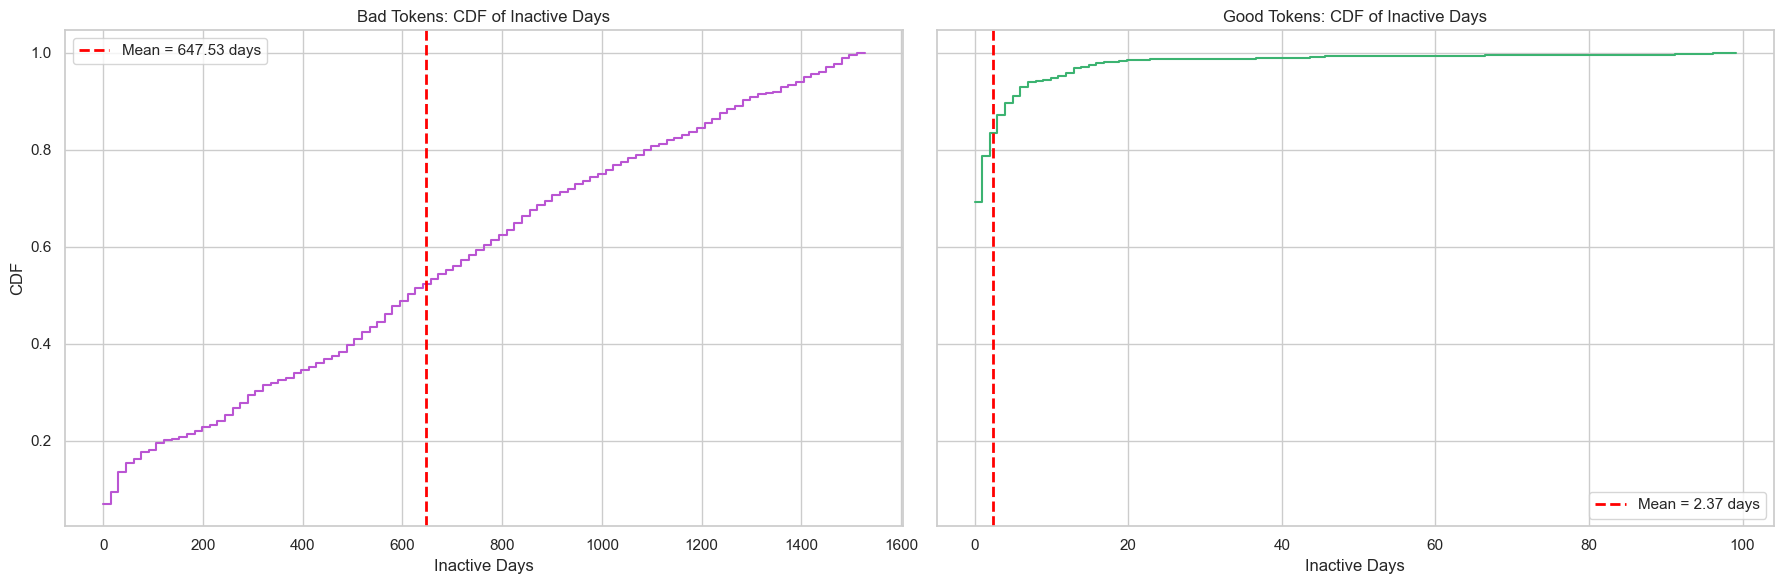

In [13]:
# Load data
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_lifecycle.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_lifecycle.csv")

# Filter out nulls
df_bad_clean = df_bad[df_bad['inactive_days'].notnull()]
df_good_clean = df_good[df_good['inactive_days'].notnull()]

# Calculate means
mean_inactive_bad = df_bad_clean['inactive_days'].mean()
mean_inactive_good = df_good_clean['inactive_days'].mean()

# Set theme
sns.set_theme(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot for bad tokens (CDF)
sns.histplot(
    df_bad_clean['inactive_days'],
    bins=100,
    stat='density',
    cumulative=True,
    color='mediumorchid',
    element='step',
    fill=False,
    ax=axes[0]
)
axes[0].axvline(mean_inactive_bad, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_inactive_bad:.2f} days')
axes[0].set_title('Bad Tokens: CDF of Inactive Days')
axes[0].set_xlabel('Inactive Days')
axes[0].set_ylabel('CDF')
axes[0].legend()
axes[0].grid(True)

# Plot for good tokens (CDF)
sns.histplot(
    df_good_clean['inactive_days'],
    bins=100,
    stat='density',
    cumulative=True,
    color='mediumseagreen',
    element='step',
    fill=False,
    ax=axes[1]
)
axes[1].axvline(mean_inactive_good, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_inactive_good:.2f} days')
axes[1].set_title('Good Tokens: CDF of Inactive Days')
axes[1].set_xlabel('Inactive Days')
axes[1].set_ylabel('')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


### holder age was removed due to difficulties in retrieving the data